For the notebook to be opertaional you can use this environment 
     
      source /afs/cern.ch/user/k/kostams/public/VirtualEnv/env.sh

In [1]:
%pylab inline
import numpy  as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as s
from matplotlib.colors import LogNorm
s.set(rc={'image.cmap': "jet"})
figsize(12,10)
rcParams['figure.facecolor'] = (1,1,1,1)
rcParams['savefig.facecolor'] = (1,1,1,1)

In [3]:
def plot_matrix(frame, **args):
    from matplotlib.colors import LogNorm
    x,y = np.meshgrid(np.array(frame.index,   dtype=float),
                      np.array(frame.columns, dtype=float))
    z = frame.T.values.astype(float)
    ret = gca().pcolor(y,x,z, **args)
    (lambda x: xlim(x[0],x[-1]))(frame.columns)
    (lambda x: ylim(x[0],x[-1]))(frame.index  ) 
    return ret

# This creates the resolution tensors and writes them to csvs

In [4]:
# There are the bins from the JS app
betaTheoretic = np.array([ 
    0.4, 0.4147083427294357, 0.4297280251026429, 0.4450403909356994, 0.4606240084534386, 0.4764546384120651, 
         0.4925052439125105, 0.5087460471842641, 0.5251446378598004, 0.5416661361701296, 0.5582734130726269, 
         0.5749273675970504, 0.5915872597150694, 0.6082110948808858, 0.6247560541596080, 0.6411789616808273, 
         0.6574367791650310, 0.6734871156098977, 0.6892887390214797, 0.7048020764378558, 0.7199896884909629, 
         0.7348167054129555, 0.7492512126947839, 0.7632645764764647, 0.7768317010774621, 0.7899312137155933, 
         0.8025455742483953, 0.8146611105322752, 0.8262679825729968, 0.8373600809008588, 0.8479348664431029, 
         0.8579931605210849, 0.8675388944464776, 0.8765788285418612, 0.8851222503098053, 0.8931806609871203, 
         0.9007674589276944, 0.9078976272444162, 0.9145874319927806, 0.9208541359733099, 0.9267157320331831, 
         0.9321906986122767, 0.9372977792440818, 0.9420557868130696, 0.9464834326004606, 0.9505991795234627, 
         0.9544211184844238, 0.9579668663859606, 0.9612534841221809, 0.9642974127088534, 0.9671144256503917,
         0.9697195956427809, 0.9721272737641616, 0.9743510793953442, 0.9764038992294443, 0.9782978938634144, 
         0.9800445106065235, 0.9816545012855892, 0.9831379439691663, 0.9845042676694992, 0.9857622792093981, 
         0.9869201915597940, 0.9879856530617125, 0.9889657770435114, 0.9898671714305440, 0.9906959680203582, 
         0.9914578511627253, 0.9921580856409233, 0.9928015435995934, 0.9933927304059403, 0.9939358093658833, 
         0.9944346252457511, 0.9948927265739774, 0.9953133867166960, 0.9956996237367265, 0.9960542190577868, 
         0.9963797349653267, 0.9966785309825973, 0.9969527791658416, 0.9972044783661363, 0.9974354675077245, 
         0.9976474379339008, 0.9978419448718635, 0.9980204180675922, 0.9981841716409147, 0.9983344132096104, 
         0.9984722523297661, 0.9985987082977400, 0.9987147173570756, 0.9988211393515946, 0.9989187638637343, 
         0.9990083158750230, 0.9990904609834247, 0.9991658102101691, 0.9992349244266255, 0.9992983184297834, 
         0.9993564646930042, 0.9994097968168774, 0.9994587127032906, 0.9995035774741808, 0.9995447261548852,
         0.9995824661405623, 0.9996170794627837, 0.9996488248721179, 0.9996779397513396, 0.9997046418727785 
])
mp, md = 0.9382, 1.8756
rgdtTheoretic = mp * betaTheoretic / np.sqrt(1 - betaTheoretic**2)

In [5]:
from bq_hist import get_hist_series

In [ ]:
betaMeasured=np.linspace(0.4,1.5,100)
rgdtMeasured=np.linspace(0.0, 15,151)

In [ ]:
genBeta = "GenMomentum/SQRT(0.88022 + POW(GenMomentum,2))"
varNames = [('BetaTOF',  'Beta',   betaMeasured ),
            ('R',        'R',   rgdtMeasured ),
            (genBeta,    'TrueB', betaTheoretic)]

# Read proton MC
seriesB1034 = get_hist_series('AMS.protonsB1034',varNames)
seriesB800  = get_hist_series('AMS.protonsB800', varNames)

# Read deuteron MC
genBeta = "GenMomentum/SQRT(3.515625 + POW(GenMomentum,2))"
varNames = [('BetaTOF',  'Beta',   betaMeasured ),
            ('R',        'R',   rgdtMeasured ),
            (genBeta,    'TrueB', betaTheoretic)]
seriesDeut = get_hist_series('AMS.dB1030_GG_Blic',varNames)

#Read Data
seriesData = get_hist_series('AMS.Data',varNames[:-1])

In [ ]:
save = True
if save:
    import gzip
    seriesB1034.to_csv(gzip.open("seriesB1034.csv.gz","w"))
    seriesB800.to_csv( gzip.open("seriesB800.csv.gz","w"))
    seriesData.to_csv(gzip.open("seriesData.csv.gz","w"))
    seriesDeut.to_csv(gzip.open("seriesDeuterons.csv.gz","w"))

# Load the csvs and do the work

In [ ]:
load = True
if load:
    import gzip 
    args = { "header":None, "index_col": [0,1,2]}

    seriesB1034 = pd.Series.from_csv(gzip.open("seriesB1034.csv.gz","r"), **args)
    seriesB1034.index.names = ['Beta','R','TrueB']

    seriesB800  = pd.Series.from_csv(gzip.open("seriesB800.csv.gz","r"), **args)
    seriesB800.index.names = ['Beta','R','TrueB']

    seriesDeut  = pd.Series.from_csv(gzip.open("seriesDeuterons.csv.gz","r"), **args)
    seriesDeut.index.names = ['Beta','R','TrueB']

    args['index_col'] = [0,1]
    seriesData  = pd.Series.from_csv(gzip.open("seriesData.csv.gz","r"), **args)
    seriesData.index.names = ['Beta','R']

In [ ]:
def expectedCounts(resolutions,fluxes,mask=None):
    """ Makes expectd counts given a list of fluxes and a list of resolution matrices"""
    expected = None
    for res,flux in zip(resolutions,fluxes):
        if expected is None:
            expected  = res.unstack(level=2).dot(flux)
        else:
            expected += res.unstack(level=2).dot(flux)
    if mask is not None: expected[mask]=0
    return expected

def logLikelihood(obs, resolutions, fluxes, mask=None):
    """ Poissonian log likelihood for observed data and test fluxes"""
    expected = expectedCounts(resolutions, fluxes, mask)
    logP = obs * np.log(expected) - expected
    logP[expected < 1e-99] = 0
    return logP.sum()

def gradLogLikelihood(obs, resolutions, fluxes, mask=None):
    """ This calculates the gradient of the logLikelihood above at a given point"""
    expected = expectedCounts(resolutions, fluxes, mask)
    v = obs / expected - 1
    v[expected < 1e-99] = -1
    return [res.unstack(level=[0,1]).dot(v) for res in resolutions] 

In [ ]:
# Numerical check that the gradient is ok
# Takes about 2 minutes
# Set frame = True to run
frame = False

flux = pd.Series(1, seriesB1034.index.levels[2])
ll = logLikelihood(seriesData, [seriesB800], [flux])

if frame:
    df, ngrad = 0.00001, []
    for i in range(len(flux)):
        print i,
        nflux = flux.copy()
        nflux.iloc[i] += df
        ngrad.append(logLikelihood(seriesData, [seriesB800], [nflux]) - ll)
    
    frame = pd.DataFrame({
        'ngrad':pd.Series(ngrad, index=flux.index)/df,
        'grad':gradLogLikelihood(seriesData, [seriesB800], [flux])[0]
    })
    
frame

# Masking (inclomplete)

In [7]:
resP = seriesB800.sort_index().loc[0:,0:,0:]
resP = (resP.unstack()/resP.unstack().sum()).fillna(0).stack()
resD = seriesDeut.sort_index().loc[0:,0:,0:]
resD = (resD.unstack()/resD.unstack().sum()).fillna(0).stack()
obs  = seriesData.sort_index().loc[0:,0:]

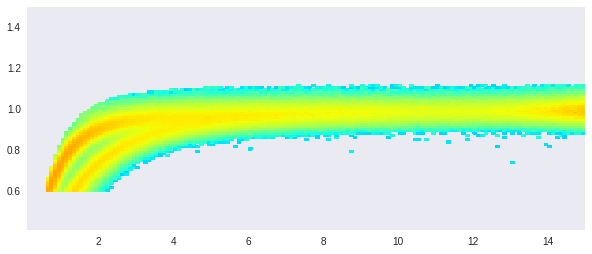

In [21]:
figsize(10,4)
mp,md = 0.938, 1.875
def R_from_beta(beta, m=mp):
    return m*beta/np.sqrt(1-beta*beta)
def beta_from_R(R, m=mp):
    return R/np.sqrt(R**2+m**2)

oneFlx = pd.Series(1.0,resP.index.levels[2])
expected = expectedCounts([resP, resD], [oneFlx,oneFlx])

tframe = expected.reset_index()
tframe['mask']  = tframe['Beta'] - beta_from_R(tframe['R'], mp) > 0.12
tframe['mask'] |= tframe['Beta'] < 0.6
tframe['mask'] |= tframe['R']    < 0.5
tframe.set_index(['Beta','R'], inplace=True)
mask = tframe['mask'] | (expected < 0.001)

expected[mask] = 0
plot_matrix(expected.unstack().iloc[1:,1:],norm=LogNorm(vmin=10**(-5),vmax=10))

# Gradient descent 

In [22]:
resP = seriesB800.sort_index().loc[0:,0:,0:]
resP = (resP.unstack()/resP.unstack().sum()).fillna(0).stack()
resD = seriesDeut.sort_index().loc[0:,0:,0:]
resD = (resD.unstack()/resD.unstack().sum()).fillna(0).stack()
obs  = seriesData.sort_index().loc[0:,0:]

In [23]:
fluxP = pd.Series(1.0,seriesB1034.index.levels[2])
fluxD = pd.Series(0.01,seriesB1034.index.levels[2])
fluxP *= obs.sum()/len(fluxP)
fluxD *= obs.sum()/len(fluxP)

In [24]:
def ll(fs):
    return logLikelihood(obs, [resP, resD], fs, mask=mask)

fP, fD = fluxP[0:], fluxD[0:]
logL = ll([fP,fD])

In [25]:
dfx , pfx = [], []
for i in range(10):
    a = 100000
    gP, gD = gradLogLikelihood(obs, [resP, resD], [fP,fD], mask=mask)
    fP, fD = fP + a * gP, fD #+ a * gD
    fP[fP < 0] = 0
    fD[fD < 0] = 0
    dfx.append(fD)
    pfx.append(fP)
    newLL = ll([fP,fD])
    print logL, newLL
    logL = newLL

353794732.139 356156608.611
356156608.611 357450577.804
357450577.804 358268048.46
358268048.46 358793492.99
358793492.99 359123715.713
359123715.713 359332053.541
359332053.541 359463781.829
359463781.829 359548148.57
359548148.57 359611338.676
359611338.676 359669877.55


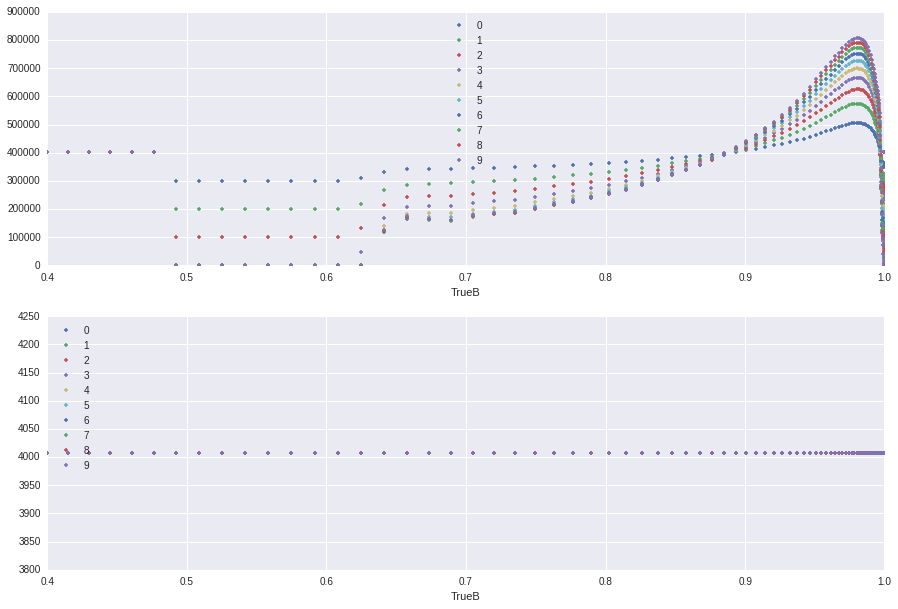

In [26]:
figsize(15,10)
subplot(211)
pd.DataFrame(pfx).T.plot(marker='.', lw=0, ax=gca())
subplot(212)
pd.DataFrame(dfx).T.plot(marker='.', lw=0, ax=gca())

359669877.55


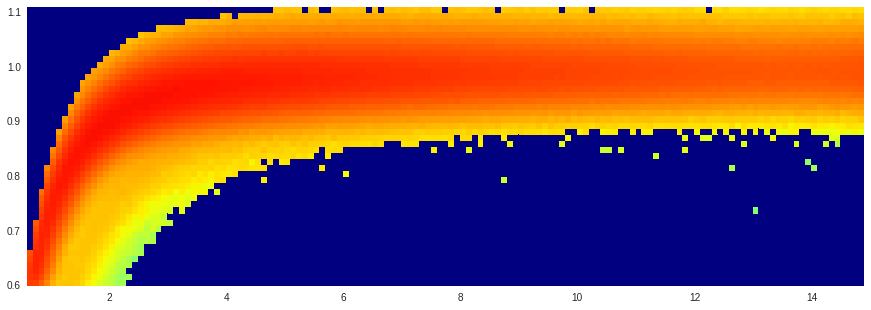

In [27]:
figsize(15,5)
print ll([fP,fD])
expected = expectedCounts([resP, resD], [fP,fD])
plot_matrix(expected[~mask].unstack(),norm=LogNorm(vmin=10**(-5),vmax=1000000))

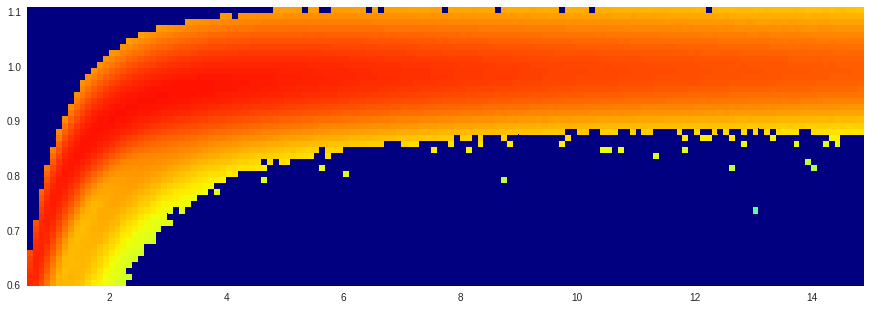

In [28]:
plot_matrix( obs[~mask].unstack(),norm=LogNorm(vmin=10**(-5),vmax=1000000))

<matplotlib.colorbar.Colorbar instance at 0xfb123f8>

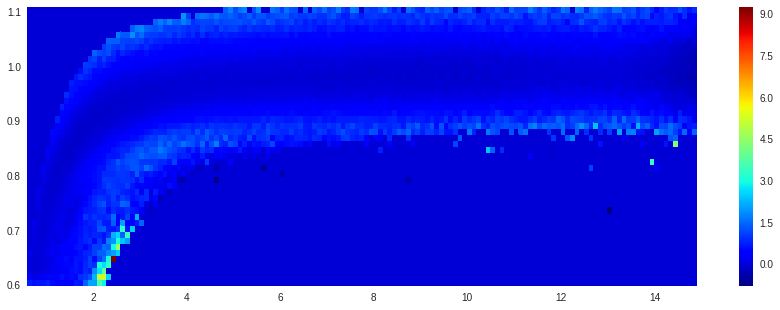

In [29]:
p = plot_matrix((obs[~mask].unstack() / expected[~mask].unstack() - 1).fillna(0))
colorbar(p)

In [32]:
# This does the parsing
def request_and_parse(url):
    import warnings; warnings.filterwarnings('ignore')
    import requests
    data = requests.get(url)
    cols, frame = [], []
    for l in data.text.splitlines():
        if l[0] == '#': 
            if not 'Col' in l: continue
            cols.append(' '.join(l.split()[3:]))
            continue
        frame.append(l.split())
    frame = pd.DataFrame(frame, columns=cols)
    frame.iloc[:,3:11] = frame.iloc[:,3:11].astype(float)
    return frame

def doplt(frame):
    nerr = frame.iloc[:,[7, 9]].sum(axis=1)
    perr = frame.iloc[:,[8,10]].sum(axis=1)
    errorbar(frame.iloc[:,3],frame.iloc[:,6], yerr=[-nerr, perr], fmt='D', label=frame.name)
    return frame

(0, 1)

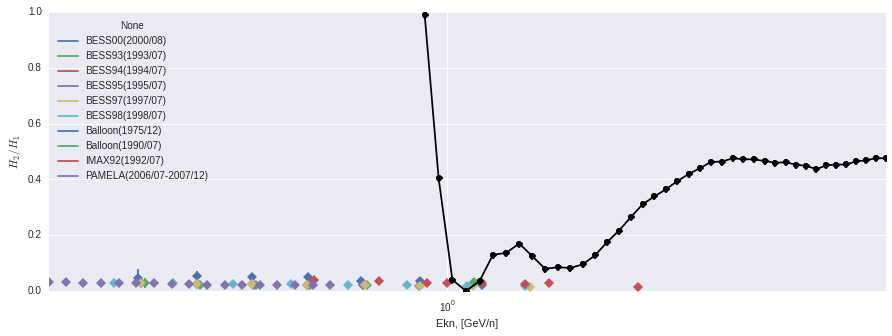

In [33]:
frame = request_and_parse("https://lpsc.in2p3.fr/cosmic-rays-db/_dialog_result.php?num=2H&den=1H&energy_type=EKN")
frame.groupby(frame.columns[1]).apply(doplt);
legend()
xscale('log')
xlabel("Ekn, [GeV/n]")
ylabel("$H_2/H_1$")
frac = (fD/fP).ix[0.7:]
frac.index = frac.index.map(lambda b: md/np.sqrt(1-b*b) -md)
frac.ix[:10].plot(marker='o', color='k')
ylim(0,1)

In [37]:
md

1.875

# Plots for presentation

In [88]:
idx = fP.index
idMatr = pd.DataFrame(np.diag([1]*len(idx)), index=idx, columns=idx)

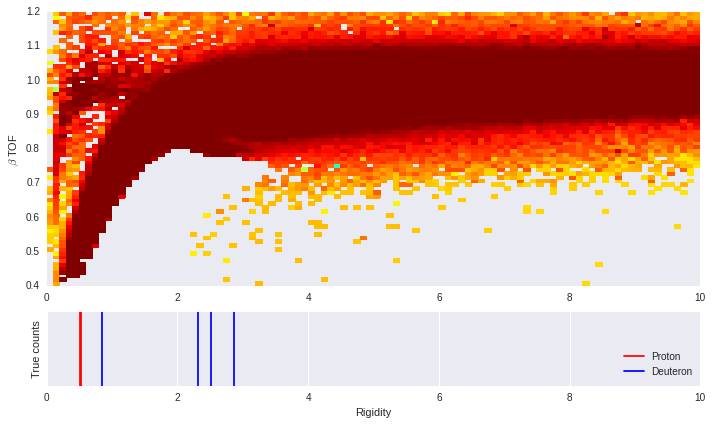

In [87]:
# Demonstration
figsize(10,6)

#fluxP = idMatr.iloc[0]#+idMatr.iloc[30]+idMatr.iloc[70]
#fluxD = 0*(idMatr.iloc[35] + idMatr.iloc[45])

#fluxP = idMatr.iloc[50]+idMatr.iloc[30]+idMatr.iloc[70]
#fluxD = 1*(idMatr.iloc[35] + idMatr.iloc[45])

#fluxP = pd.Series(0.0,index=idMatr.index);fluxP *= (1+2*np.arctan((fluxP.index.map(R_from_beta)-2)*7)/np.pi)/2
#fluxD = pd.Series(1,index=idMatr.index);fluxD *= (1+2*np.arctan((fluxD.index.map(R_from_beta)-2)*20)/np.pi)/2

#fluxP=fP.copy()
#fluxD=fD.copy()


subplot2grid((4,1),(0,0),rowspan=3)
plot_matrix( 
    resP.unstack(level=2).dot(fluxP).unstack() + 
    resD.unstack(level=2).dot(fluxD).unstack(),
    norm=LogNorm(vmin=10**(-5),vmax=1000)
)

ylabel("$\\beta$ TOF")
xlim(0,10); ylim(0.4,1.2)
subplot2grid((4,1),(3,0))

fluxP.index = fluxP.index.map(R_from_beta); 
plot(fluxP.index, fluxP.values, drawstyle="steps", color='r', label='Proton')
fluxD.index = fluxD.index.map(lambda x: R_from_beta(x, md)); 
plot(fluxD.index, fluxD.values, drawstyle="steps", color='b', label='Deuteron')
xlabel("Rigidity"); ylabel("True counts")
xlim(0,10);         ylim(0,4)
yticks([]); legend(loc=4)
tight_layout()

In [49]:
fP

TrueB
-1.000000   -55.644848
 0.400000     1.000000
 0.414708     1.000000
 0.429728     1.000000
 0.445040     1.000000
 0.460624     1.000000
 0.476455     1.000005
 0.492505     1.000880
 0.508746     1.069486
 0.525145     1.199043
 0.541666     1.253563
 0.558273     1.254457
 0.574927     1.297965
 0.591587     1.338894
 0.608211     1.334351
 0.624756     1.335747
 0.641179     1.335078
 0.657437     1.337586
 0.673487     1.341274
 0.689289     1.355497
 0.704802     1.374831
 0.719990     1.393621
 0.734817     1.418444
 0.749251     1.456818
 0.763265     1.498804
 0.776832     1.541545
 0.789931     1.589319
 0.802546     1.644401
 0.814661     1.699442
 0.826268     1.758939
               ...    
 0.996380     2.770913
 0.996679     2.742769
 0.996953     2.691650
 0.997204     2.598869
 0.997435     2.425895
 0.997647     2.136662
 0.997842     1.718894
 0.998020     1.230363
 0.998184     0.717973
 0.998334     0.302177
 0.998472    -0.016649
 0.998599    -0.213048
 0.99